## Black and White

In [2]:
from convolve_images_11 import *

In [3]:
input_image = load_image('almaty.jpg')

# kernel to be used to get sharpened image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = convolve2d(input_image, kernel=KERNEL)
cv2.imwrite(IMAGES_PATH + 'sharpened_almaty.jpg', image_sharpen)

image matrix size:  (800, 1200)

 First 5 columns and rows of the image matrix: 
 [[220 216 212 209 203]
 [222 218 215 213 207]
 [222 219 217 215 210]
 [221 219 217 215 210]
 [221 219 218 216 210]]


True

In [4]:
image_sharpen

array([[150, 174, 164, ...,  46,  43, 195],
       [194, 218, 215, ..., 157, 153,  51],
       [192, 219, 219, ..., 154, 156,  54],
       ...,
       [ 19,  15,  18, ...,  41,  40,  66],
       [104,  87,  66, ...,  33,  42,  79],
       [243,  25,  62, ...,  54,  72, 118]], dtype=uint8)

In [3]:
import matplotlib.pyplot as plt

In [4]:
def save_and_show(input_image, output_image, KERNEL):
    if input_image is None:
        print("Ошибка загрузки изображения!")
    else:
        # Kernel для повышения резкости
        # KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
        image_sharpen = convolve2d(input_image, KERNEL)
        image_sharpen = np.clip(image_sharpen, 0, 255).astype(np.uint8)
        
        # Отображение изображений
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        axes[0].imshow(input_image, cmap='gray')
        axes[0].set_title('Original Image')
        axes[0].axis('off')
        
        axes[1].imshow(image_sharpen, cmap='gray')
        axes[1].set_title('Sharpened Image')
        axes[1].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Сохранение
        cv2.imwrite(f'images_conv/{output_image}.jpg', image_sharpen)
        print("Изображение сохранено!")

In [25]:
np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/ 16

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

image matrix size:  (800, 1200)

 First 5 columns and rows of the image matrix: 
 [[220 216 212 209 203]
 [222 218 215 213 207]
 [222 219 217 215 210]
 [221 219 217 215 210]
 [221 219 218 216 210]]


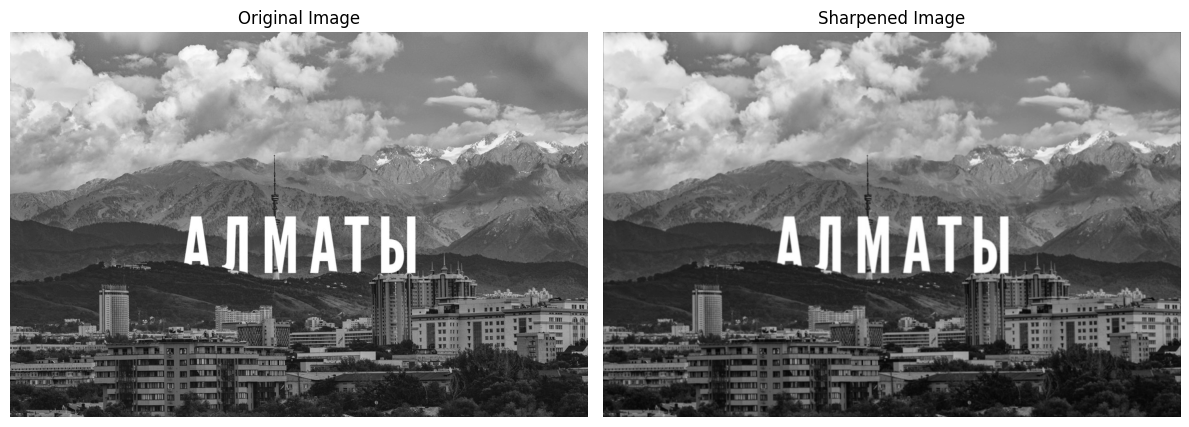

Изображение сохранено!


In [28]:
input_image = load_image('almaty.jpg')
save_and_show(input_image, 'almaty_sharp.jpg', KERNEL = np.array([[0.0625, 0.125 , 0.0625], [0.125 , 0.25  , 0.125 ], [0.0625, 0.125 , 0.0625]]))

In [5]:

input_image = load_image('input_image.jpg')

# kernel to be used to get sharpened image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = convolve2d(input_image, kernel=KERNEL)
cv2.imwrite(IMAGES_PATH + 'sharpened_image.jpg', image_sharpen)


image matrix size:  (888, 750)

 First 5 columns and rows of the image matrix: 
 [[ 66 178 182 175 171]
 [ 75 180 180 176 173]
 [ 88 182 178 178 176]
 [ 98 184 176 179 178]
 [ 99 184 174 177 177]]


True

In [6]:
import cv2

class BlacknWhite(object):
    """BlacknWhite Filter
        A class that applies BlacknWhite filter to an image.
        The class uses downsampling, bilateral filter and upsampling to create
        a BlacknWhite filter.
    """
    def __init__(self):
        pass
    def resize(self,image, window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image
    
    def render(self, img_rgb):
        img_rgb = cv2.imread(img_rgb)
        img_rgb = self.resize(img_rgb,500)
        numDownSamples = 2       # number of downscaling steps
        numBilateralFilters = 50  # number of bilateral filtering steps
        # -- STEP 1 --
        # downsample image using Gaussian pyramid
        img_color = img_rgb
        for _ in range(numDownSamples):
            img_color = cv2.pyrDown(img_color)
        #cv2.imshow("downcolor",img_color)
        #cv2.waitKey(0)
        # repeatedly apply small bilateral filter instead of applying
        # one large filter
        for _ in range(numBilateralFilters):
            img_color = cv2.bilateralFilter(img_color, 9, 9, 7)
        #cv2.imshow("bilateral filter",img_color)
        #cv2.waitKey(0)
        # upsample image to original size
        for _ in range(numDownSamples):
            img_color = cv2.pyrUp(img_color)
        #cv2.imshow("upscaling",img_color)
        #cv2.waitKey(0)
        # -- STEPS 2 and 3 --
        # convert to grayscale and apply median blur
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        return img_gray
    def start(self, img_path, image, new_image):
        tmp_canvas =BlacknWhite() #make a temporary object
        file_name = img_path #File_name will come here
        res = tmp_canvas.render(image)
        cv2.imwrite(f"{new_image}", res)
        # cv2.imshow(f"{image}", res)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        # print(f"Image saved as {new_image}")
        return 0

In [7]:
img_rgb  =  cv2.imread('input_image.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
cv2.imshow(f"test1", img_gray)

In [8]:
filter_img = BlacknWhite()

In [9]:
import os
img_path = os.getcwd()

In [11]:
filter_img.start(img_path = img_path, image = 'input_image.jpg' , new_image = 'input_image_bw.jpg')

0

In [12]:
img_rgb[0][0].shape

(3,)

In [13]:
img_rgb = cv2.imread('input_image.jpg')
#img_rgb[0].shape
#img_rgb = img_rgb.resize(img_rgb,500)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

In [14]:

cv2.imshow(f"input_image", img_gray)

## SHARPENING

In [15]:
import cv2
import numpy as np

class sharpening:
    """sharpening filter ---
        This class will apply sharpening filter to an image 
        by applying a defined kernel values to the image.
    """
    def __init__(self):
        pass
    
    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image
    
    def sharp(self,image):
        # Create sharpening kernel
        kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
        #kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        kernel = np.array([[-2, 0, -1], [-1, 1, 1], [0, 1, 2]])
        
        # applying the sharpening kernel to the input image & displaying it.
        sharpened = cv2.filter2D(image, -1, kernel)
        # Noise reduction
        sharpened = cv2.bilateralFilter(sharpened, 9, 75, 75) 
        return sharpened
    
    def start(self, img_path, new_image):
        # Create an image object
        image = cv2.imread(img_path)
        image = self.resize(image, 500)
        tmp_canvas = sharpening()
        res = tmp_canvas.sharp(image)
        cv2.imwrite(new_image, res)
        # cv2.imshow('original',image)
        # cv2.imshow('sharp',res)
        
        # print(f'Image saved as {new_image}')
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

In [16]:
filter_sharp = sharpening()

In [17]:
filter_sharp.start(img_path = 'input_image.jpg', new_image = 'input_image_sharp.jpg')

## CARTOONIZER

In [18]:

class Cartoonizer(object):
    """Cartoonizer effect
        A class that applies a cartoon effect to an image.
        The class uses a bilateral filter and adaptive thresholding to create
        a cartoon effect.
    """
    def __init__(self):
        pass
    
    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image
    def render(self, img_rgb):
        img_rgb = cv2.imread(img_rgb)
        img_rgb = self.resize(img_rgb, 500)
        numDownSamples = 2       # number of downscaling steps
        numBilateralFilters = 50  # number of bilateral filtering steps
        # -- STEP 1 --
        # downsample image using Gaussian pyramid
        img_color = img_rgb
        for _ in range(numDownSamples):
            img_color = cv2.pyrDown(img_color)
        #cv2.imshow("downcolor",img_color)
        #cv2.waitKey(0)
        # repeatedly apply small bilateral filter instead of applying
        # one large filter
        for _ in range(numBilateralFilters):
            img_color = cv2.bilateralFilter(img_color, 9, 9, 7)
        #cv2.imshow("bilateral filter",img_color)
        #cv2.waitKey(0)
        # upsample image to original size
        for _ in range(numDownSamples):
            img_color = cv2.pyrUp(img_color)
        #cv2.imshow("upscaling",img_color)
        #cv2.waitKey(0)
        # -- STEPS 2 and 3 --
        # convert to grayscale and apply median blur
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        img_blur = cv2.medianBlur(img_gray, 3)
        #cv2.imshow("grayscale+median blur",img_color)
        #cv2.waitKey(0)
        # -- STEP 4 --
        # detect and enhance edges
        img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                         cv2.ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY,9, 2)
        #cv2.imshow("edge",img_edge)
        #cv2.waitKey(0)
        # -- STEP 5 --
        # convert back to color so that it can be bit-ANDed with color image
        (x,y,z) = img_color.shape
        img_edge = cv2.resize(img_edge,(y,x))
        img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
        #cv2.imwrite("edge.png",img_edge)
        #cv2.imshow("step 5", img_edge)
        #cv2.waitKey(0)
        #img_edge = cv2.resize(img_edge,(i for i in img_color.shape[:2]))
        #print img_edge.shape, img_color.shape
        return cv2.bitwise_and(img_color, img_edge)
    def start(self, img_path, image, new_image):
        tmp_canvas = Cartoonizer() #make a temporary object
        file_name = img_path #File_name will come here
        res = tmp_canvas.render(image)
        cv2.imwrite(new_image, res)
        # cv2.imshow("Cartoon version", res)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        # print(f"Image saved as '{new_image}'")

In [19]:
cartoon_filter = Cartoonizer()

In [20]:
cartoon_filter.start(img_path = img_path, image = 'input_image.jpg', new_image = 'input_image_cartoon.jpg' )

## Negative filtering

In [21]:


# find max GSV 
def findMax(k):
    mx = 0
    for i in k:
        if i>mx:
            mx = i
    return mx

class Negative(object):

    def __init__(self):
        pass
    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image
    
    def render(self, img_rgb):
        img_gray = cv2.imread(img_rgb, 0)
        img_gray = self.resize(img_gray, 500)
        #get all image values
        k = []
        for i in range(img_gray.shape[0]):
            for j in range(img_gray.shape[1]):
                k.append(img_gray[i,j])
        L = findMax(k) #max GSV
        dst = img_gray[:] #copy image
        #update dst
        for i in range(img_gray.shape[0]):
          for j in range(img_gray.shape[1]):
            dst[i,j] = L - dst[i,j]
        return dst
    def start(self, img_path, image, new_image):
        tmp_canvas = Negative() #make a temporary object
        file_name = img_path #File_name will come here
        res = tmp_canvas.render(image)
        cv2.imwrite(new_image, res)
        cv2.imshow("Negative Version", res)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("Image saved as {new_image}")
    

In [22]:
negative_filter = Negative()

In [23]:
negative_filter.start(img_path, image = 'input_image.jpg', new_image = 'input_image_negative.jpg' )

Image saved as {new_image}


## OLD FILTER

In [24]:
import numpy as np
import argparse
import random
import os, sys

class old_filter(object):
    """old_filter effect
        A class that applies a random old filter effect to an image
        using a set of pre-designed filters and applying Arithmetic 
        Operations on Image to add the filter effect on it.
    """
    
    def __init__(self):
        pass
    
    #function to resize
    #according to the aspect ratio of the image
    def resize(self,image,window_height = 500):
        aspect_ratio = float(image.shape[1])/float(image.shape[0])
        window_width = window_height/aspect_ratio
        image = cv2.resize(image, (int(window_height),int(window_width)))
        return image
    #function that renders the image
    def render(self, img_rgb):
        img = cv2.imread(img_rgb,0)
        img = self.resize(img, 500)
        
        filtern = []
        filters = list(range(1,7))
        for l in filters:
            filtern.append(str(l) +'n')
        #filtern -> stores numbers (1-7) with preceeding n
        #filters -> all numbers (1-7) and elements of filtern
        filters.extend(filtern)
             
        #selects random filter everytime
        selectedfilter = str(random.choice(filters))
        #print(selectedfilter)
        #filter path in generalized form to work in all systems
        #filter_path = os.path.abspath(os.path.join('oldfilters','old' + selectedfilter + '.jpg'))
        filter_path = img_rgb
        if selectedfilter.endswith('n'):
            #selected file is an normal filter and Arithmetic addition 
            #needs to be applied on it 
            
            old = cv2.imread(filter_path,0)
            old = cv2.resize(old,(img.shape[1],img.shape[0]))
            #cv2.imshow('filter',old)
            #cv2.imshow('image',img)
            
            #Arithmetic add
            add=cv2.add(img,old)
            return add
                    
        else:
            #selected file is an inverted filter and Weighted addition 
            #needs to be applied on it 
            
            old = cv2.imread(filter_path, 0)
            old = cv2.resize(old,(img.shape[1],img.shape[0]))
            #print old.shape
            #for i in range(old.shape[0]):
            #	 for j in range(old.shape[1]):
            #		if old[i][j]>200:
            #			old[i][j]=255
            #cv2.imshow('filter',old)
            #cv2.imshow('image',img)
        
            #Weightedadd
            add=cv2.addWeighted(img,0.7,old,0.3,0)
            return add
                     
    def start(self, image, new_image):
        #make a temporary object
        tmp_canvas = old_filter()
        #File_name will come here
        res = tmp_canvas.render(image)
        cv2.imwrite(new_image, res)
        cv2.imshow("old version", res)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print(f"Image saved as {new_image}")

In [25]:
old_filters = old_filter()

In [26]:
old_filters.start(image = 'input_image.jpg',  new_image = 'input_image_old.jpg' )

Image saved as input_image_old.jpg
